<p align="center">
  <img src="images\ShapeFunctions.png" width="460" height="300" />
</p>

$$
u(x) = c_1 + c_2 x
$$
  
$$
u_1 = c_1 + c_2 x_1  
$$
  
$$
u_2 = c_1 + c_2 x_2  
$$

$$\begin{bmatrix}
u_1 \\
u_2
\end{bmatrix} = \begin{bmatrix}
1 & x_1\\
1 & x_2
\end{bmatrix}\begin{bmatrix}
c_1 \\
c_2 
\end{bmatrix}$$
  
$$
u = A c
$$

$$
c = A^{-1} u
$$


In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x = sp.symbols('x')
x1 = sp.symbols('x_1')
x2 = sp.symbols('x_2')
u1 = sp.symbols('u_1')
u2 = sp.symbols('u_2')

In [2]:
A = sp.Matrix([[1,x1],[1,x2]])

In [3]:
u = sp.Matrix([u1,u2])

In [4]:
c = A.inv() @ u

In [5]:
c

Matrix([
[u_1*x_2/(-x_1 + x_2) - u_2*x_1/(-x_1 + x_2)],
[       -u_1/(-x_1 + x_2) + u_2/(-x_1 + x_2)]])

In [6]:
c1 = c[0]
c2 = c[1]

In [7]:
c1

u_1*x_2/(-x_1 + x_2) - u_2*x_1/(-x_1 + x_2)

In [8]:
u_yak = c1 + c2 * x
u_yak

u_1*x_2/(-x_1 + x_2) - u_2*x_1/(-x_1 + x_2) + x*(-u_1/(-x_1 + x_2) + u_2/(-x_1 + x_2))

### Shape Functions

$$
u(x) = u_1 \phi_1 + u_2 \phi_2
$$

In [9]:
uh = sp.factor(u_yak, (u1,u2))
uh_n = sp.expand(uh, (u1,u2))
uh_ne = sp.collect(uh_n, (u1,u2))
uh_ne

u_1*(-x/(-x_1 + x_2) + x_2/(-x_1 + x_2)) + u_2*(x/(-x_1 + x_2) - x_1/(-x_1 + x_2))

In [19]:
L = sp.symbols('L')

uh_ne.subs({x1:0,x2:L})

u_1*(1 - x/L) + u_2*x/L

$$
u(x) = u_1 \phi_1 + u_2 \phi_2 = c_1 + c_2 x
$$


$$
u = \begin{bmatrix}
\phi_1 & \phi_2\\
\end{bmatrix}\begin{bmatrix}
u_1 \\
u_2 
\end{bmatrix} = \begin{bmatrix}
1 & x\\
\end{bmatrix}\begin{bmatrix}
c_1 \\
c_2 
\end{bmatrix}
$$


$$
u(x) = N^T u = X^T c
$$

$$\begin{bmatrix}
u_1 \\
u_2
\end{bmatrix} = \begin{bmatrix}
1 & x_1\\
1 & x_2
\end{bmatrix}\begin{bmatrix}
c_1 \\
c_2 
\end{bmatrix}$$
  
$$
u = A c
$$


$$
N^T A c = X^T c
$$

$$
N^T A = X^T
$$

$$
N^T A A^{-1} = X^T A^{-1}
$$

$$
N^T = X^{T} A^{-1}
$$

In [11]:
L = sp.symbols('L')

X = sp.Matrix([1,x]).T

A = sp.Matrix([[1,0],
               [1,L]])

N = X @ A.inv()

N

Matrix([[1 - x/L, x/L]])

In [12]:
sum(N)

1

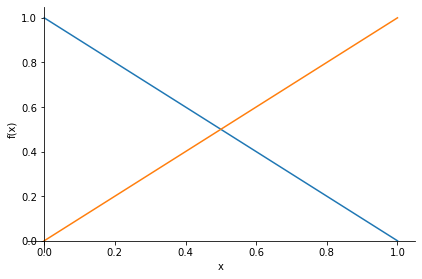

In [13]:
p1 = sp.plot(N[0].subs(L,1),N[1].subs(L,1),(x, 0, 1))

<p align="center">
  <img src="images\3noded1el.png" width="460" height="300" />
</p>

$$
u(x) = u_1 \phi_1 + u_2 \phi_2 + u_3 \phi_3 = c_1 + c_2 x + c_3 x^2
$$


$$A = \begin{bmatrix}
1 & x_1 & x_1^2\\
1 & x_2 & x_2^2\\
1 & x_3 & x_3^2 
\end{bmatrix}$$

$$A = \begin{bmatrix}
1 & 0 & 0\\
1 & L/2 & L^2/4\\
1 & L & L^2 
\end{bmatrix}$$

In [14]:
X = sp.Matrix([1,x,x**2]).T
A = sp.Matrix([[X.subs(x,0)],
               [X.subs(x,L/2)],
               [X.subs(x,L)]])

A

Matrix([
[1,   0,      0],
[1, L/2, L**2/4],
[1,   L,   L**2]])

In [15]:
N = X @ A.inv()
N

Matrix([[1 - 3*x/L + 2*x**2/L**2, 4*x/L - 4*x**2/L**2, -x/L + 2*x**2/L**2]])

In [16]:
sum(N)

1

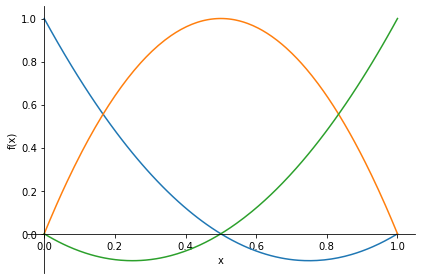

In [17]:
p1 = sp.plot(N[0].subs(L,1),N[1].subs(L,1),N[2].subs(L,1),(x, 0, 1))

## 4 Node Element

<p align="center">
  <img src="images\rectangleshape.png" width="460" height="300" />
</p>

In [26]:
a,b,x,y = sp.symbols('a,b,x,y')

coordinates = [[0,0],
               [a,0],
               [a,b],
               [0,b]]

X_rectangle = sp.Matrix([1,x,y,x*y]).T

A_rectangle = sp.Matrix([[X_rectangle.subs({x:coor[0],y:coor[1]})] for coor in coordinates])

N_rectangle = X_rectangle @ A_rectangle.inv()

A_rectangle

Matrix([
[1, 0, 0,   0],
[1, a, 0,   0],
[1, a, b, a*b],
[1, 0, b,   0]])

In [28]:
N_rectangle.T

Matrix([
[1 - y/b - x/a + x*y/(a*b)],
[          x/a - x*y/(a*b)],
[                x*y/(a*b)],
[          y/b - x*y/(a*b)]])

In [20]:
sum(N_rectangle)

1

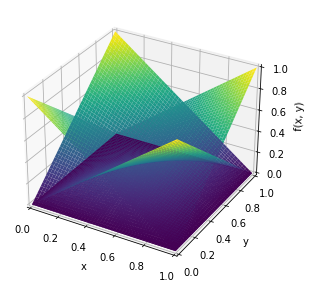

In [24]:
sp.plotting.plot3d((N_rectangle[0].subs({a:1,b:1}), (x, 0, 1), (y, 0, 1)),
                   (N_rectangle[1].subs({a:1,b:1}), (x, 0, 1), (y, 0, 1)),
                   (N_rectangle[2].subs({a:1,b:1}), (x, 0, 1), (y, 0, 1)),
                   (N_rectangle[3].subs({a:1,b:1}), (x, 0, 1), (y, 0, 1)));

In [78]:
def shapeFunc(n,d1,d2):
    X = sp.Matrix([x**i for i in range(n)]).T
    lim1 = d1/L
    lim2 = d2/L
    aralik = (lim2-lim1)/(n-1)
    A = sp.Matrix([[X.subs(x,val*L)] for val in np.arange(lim1,lim2+aralik,aralik)])
    return X @ A.inv()

shapes = shapeFunc(2,0,L)
shapes    

Matrix([[1/2 - x/(2*L), 1/2 + x/(2*L)]])

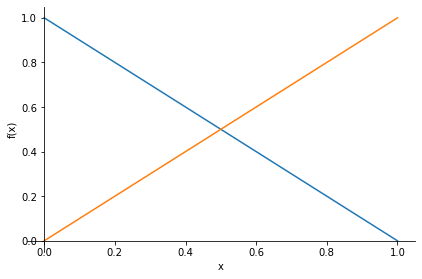

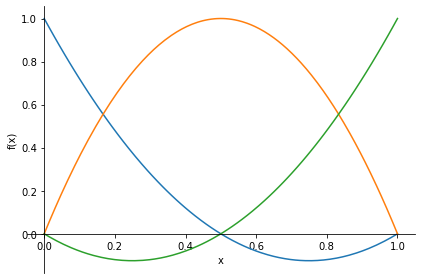

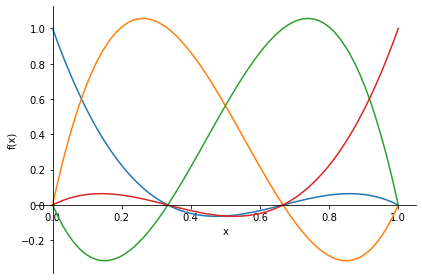

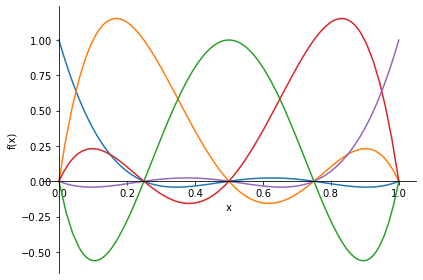

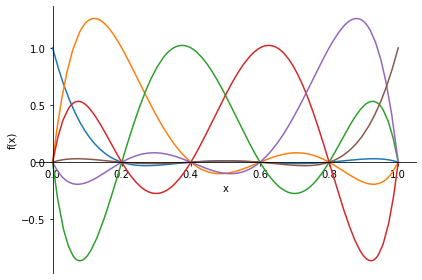

In [88]:
for i in range(2,7):
    shapes = shapeFunc(i,0,L)
    p1 = sp.plot(*shapes.subs(L,1),(x, 0, 1))